# Pandas 簡介

## Pandas 是 Python 裡面被用來作資料分析及整理最常用的套件。

### 這一份筆記主要說明以下重點：

* 資料結構及其基本操作
  - Series
  - DataFrame
* 網路資料存取
* 資料視覺化

參考資料：

* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/version/0.18.0/cookbook.html)
* [Pandas 入門介紹](https://github.com/Wei1234c/Introduction_to_Pandas)
* [Financial Time Series](https://github.com/yhilpisch/py4fi/blob/master/ipython3/06_Financial_Time_Series.ipynb)
* [Pandas API references](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)

In [2]:
import pandas as pd

pd.__version__

'0.23.4'

In [3]:
%matplotlib inline

import numpy as np
from datetime import datetime

## Pandas 的資料結構

### Series

In [4]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
u = pd.Series([1, 2, 3, 4, 5])
u

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
s+u

0     2
1     4
2     6
3     8
4    10
dtype: int64

#### Series 跟 ndarray 有什麼不同呢？

In [7]:
s.values

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
s.index

RangeIndex(start=0, stop=5, step=1)

#### index 可以在創建 Series 時指定

In [9]:
s = pd.Series(range(5), index=list('abcde'))

In [10]:
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [11]:
u.index = list('bcdef')

In [12]:
u

b    1
c    2
d    3
e    4
f    5
dtype: int64

In [13]:
s+u

a    NaN
b    2.0
c    4.0
d    6.0
e    8.0
f    NaN
dtype: float64

#### index 也可以在創建完 Series 後指定

In [14]:
s.index = list('fghij')
s

f    0
g    1
h    2
i    3
j    4
dtype: int64

#### 什麼是 reindex？

In [15]:
s.reindex(list('hijabcd'))

h    2.0
i    3.0
j    4.0
a    NaN
b    NaN
c    NaN
d    NaN
dtype: float64

In [16]:
s

f    0
g    1
h    2
i    3
j    4
dtype: int64

In [17]:
s.dtype

dtype('int64')

In [18]:
s.shape

(5,)

In [19]:
s.ndim

1

In [26]:
s

f    0
g    1
h    2
i    3
j    4
dtype: int64

In [27]:
s['i']

3

In [28]:
s['f':'h']

f    0
g    1
h    2
dtype: int64

### DataFrame

In [29]:
data = np.random.randn(10, 4)

In [30]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,0.017341,-0.509292,0.323202,2.280254
1,0.667636,0.771886,-1.021116,0.592380
2,-0.344540,0.712854,-1.045454,-0.574233
3,-1.219426,2.261405,0.614903,1.392151
4,0.442346,1.658667,-0.814581,-0.404168
5,0.800603,1.290343,-0.347460,-0.416515
6,0.403678,-0.550889,1.800699,1.266145
7,0.173590,1.302377,0.325026,-1.873474
8,-0.072158,-0.471311,-0.149136,-0.313090
9,0.087755,-0.765110,1.003228,-0.418311


In [31]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,0.017341,-0.509292,0.323202,2.280254
1,0.667636,0.771886,-1.021116,0.592380
2,-0.344540,0.712854,-1.045454,-0.574233
3,-1.219426,2.261405,0.614903,1.392151
4,0.442346,1.658667,-0.814581,-0.404168
5,0.800603,1.290343,-0.347460,-0.416515
6,0.403678,-0.550889,1.800699,1.266145
7,0.173590,1.302377,0.325026,-1.873474
8,-0.072158,-0.471311,-0.149136,-0.313090
9,0.087755,-0.765110,1.003228,-0.418311


In [32]:
df.index = pd.date_range('2016-01-01', periods=10)
df

,No1,No2,No3,No4
2016-01-01,0.017341,-0.509292,0.323202,2.280254
2016-01-02,0.667636,0.771886,-1.021116,0.592380
2016-01-03,-0.344540,0.712854,-1.045454,-0.574233
2016-01-04,-1.219426,2.261405,0.614903,1.392151
2016-01-05,0.442346,1.658667,-0.814581,-0.404168
2016-01-06,0.800603,1.290343,-0.347460,-0.416515
2016-01-07,0.403678,-0.550889,1.800699,1.266145
2016-01-08,0.173590,1.302377,0.325026,-1.873474
2016-01-09,-0.072158,-0.471311,-0.149136,-0.313090
2016-01-10,0.087755,-0.765110,1.003228,-0.418311


In [34]:
df.loc['2016-01-06']

No1    0.800603
No2    1.290343
No3   -0.347460
No4   -0.416515
Name: 2016-01-06 00:00:00, dtype: float64

In [35]:
df['2016-01-06':'2016-01-08']

,No1,No2,No3,No4
2016-01-06,0.800603,1.290343,-0.347460,-0.416515
2016-01-07,0.403678,-0.550889,1.800699,1.266145
2016-01-08,0.173590,1.302377,0.325026,-1.873474


In [ ]:
df.drop(datetime(2016, 1, 3), inplace=True)
df

In [ ]:
df.index=range(9)
df

In [33]:
df.iloc[1]

No1    0.667636
No2    0.771886
No3   -1.021116
No4    0.592380
Name: 2016-01-02 00:00:00, dtype: float64

In [ ]:
df.drop(4)

In [39]:
df

,No1,No2,No3,No4
2016-01-01,0.017341,-0.509292,0.323202,2.280254
2016-01-02,0.667636,0.771886,-1.021116,0.592380
2016-01-03,-0.344540,0.712854,-1.045454,-0.574233
2016-01-04,-1.219426,2.261405,0.614903,1.392151
2016-01-05,0.442346,1.658667,-0.814581,-0.404168
2016-01-06,0.800603,1.290343,-0.347460,-0.416515
2016-01-07,0.403678,-0.550889,1.800699,1.266145
2016-01-08,0.173590,1.302377,0.325026,-1.873474
2016-01-09,-0.072158,-0.471311,-0.149136,-0.313090
2016-01-10,0.087755,-0.765110,1.003228,-0.418311


In [40]:
df['No1']

2016-01-01    0.017341
2016-01-02    0.667636
2016-01-03   -0.344540
2016-01-04   -1.219426
2016-01-05    0.442346
2016-01-06    0.800603
2016-01-07    0.403678
2016-01-08    0.173590
2016-01-09   -0.072158
2016-01-10    0.087755
Freq: D, Name: No1, dtype: float64

In [41]:
df[['No1']]

,No1
2016-01-01,0.017341
2016-01-02,0.667636
2016-01-03,-0.344540
2016-01-04,-1.219426
2016-01-05,0.442346
2016-01-06,0.800603
2016-01-07,0.403678
2016-01-08,0.173590
2016-01-09,-0.072158
2016-01-10,0.087755


In [42]:
df[['No1','No3']]

,No1,No3
2016-01-01,0.017341,0.323202
2016-01-02,0.667636,-1.021116
2016-01-03,-0.344540,-1.045454
2016-01-04,-1.219426,0.614903
2016-01-05,0.442346,-0.814581
2016-01-06,0.800603,-0.347460
2016-01-07,0.403678,1.800699
2016-01-08,0.173590,0.325026
2016-01-09,-0.072158,-0.149136
2016-01-10,0.087755,1.003228


## 使用 Pandas 作資料存取

### 這一部分包括底下幾個重點：

* read_csv() 的使用
* read_html() 的使用
* 如何抓取股市資訊？

底下練習一下將 [台灣證券交易所 - 加權股價指數歷史資料](http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php#) 的資料轉成 DataFrame。

### 使用 read_csv() 讀取資料

參考連結：[pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [ ]:
df = pd.read_csv("data/MI_5MINS_HIST10603.csv", encoding="Big5", header=1)

In [ ]:
df

In [ ]:
df.drop(df.index[len(df.index)-1], inplace=True)
df

### 使用 read_html() 讀取資料

參考連結：[pandas.read_html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html)

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
r = requests.get("http://www.tse.com.tw/ch/trading/indices/MI_5MINS_HIST/MI_5MINS_HIST.php")
r.encoding = 'Big5'

In [ ]:
soup = BeautifulSoup(r.text, "lxml")
tables = soup.select("table.board_trad")
tables

In [ ]:
type(tables[0])

In [ ]:
df_list = pd.read_html(str(tables[0]), header=1)

In [ ]:
df_list[0]

### 使用 Pandas 讀取股價資訊

參考資料：[pandas-datareadre 說明文件](https://pandas-datareader.readthedocs.io/en/latest/)

In [43]:
import pandas_datareader.data as web
from datetime import datetime

In [44]:
df = web.DataReader("TSLA", 'yahoo', datetime(2018,1,1))
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004


In [45]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-27,316.299988,300.549988,301.779999,314.739990,11183900,314.739990
2019-02-28,320.000000,310.809998,318.920013,319.880005,10520700,319.880005
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985
2019-03-05,284.000000,270.100006,282.000000,276.540009,18742000,276.540009


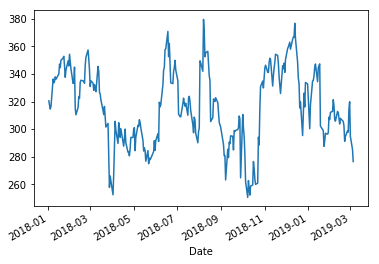

In [46]:
df['Close'].plot()

In [47]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,294.000000,294.000000,294.000000,294.000000,2.940000e+02,294.000000
mean,322.633844,309.736734,316.283537,316.451361,8.586550e+06,316.451361
std,27.783457,27.533607,27.404674,27.533084,4.892061e+06,27.533084
min,260.329987,244.589996,252.779999,250.559998,3.080700e+06,250.559998
25%,302.924995,291.412491,297.700012,296.814995,5.570000e+06,296.814995
50%,322.024994,308.904999,315.689987,315.910004,7.135900e+06,315.910004
75%,347.147499,333.237511,339.655006,339.727501,9.507275e+06,339.727501
max,387.459991,367.119995,375.000000,379.570007,3.364970e+07,379.570007


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-01-02 to 2019-03-05
Data columns (total 6 columns):
High         294 non-null float64
Low          294 non-null float64
Open         294 non-null float64
Close        294 non-null float64
Volume       294 non-null int64
Adj Close    294 non-null float64
dtypes: float64(5), int64(1)
memory usage: 16.1 KB


## 資料視覺化

Series 跟 DataFrame 都附帶有一個產生各類圖表的 plot()，預設的情況下，它會產生線形圖。

參考資料：[Pandas Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [ ]:
s = pd.Series(np.random.randn(10), index=np.arange(10))
s.plot()

In [ ]:
s.plot(kind="bar")

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
df.plot()

In [ ]:
df.plot(kind='bar')